
<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری چهارم تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: محمد چوپان  
    </h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>


<div dir="rtl">
    
<p dir=rtl style="font-size: 16;line-height:100%;font-family:vazir;color:red;direction:rtl">
لطفا خواسته های تمرین را در بخش خودش انجام دهید.
</p>
</div>

# HW4

## Imports

In [23]:
## TODO
## TODO
## TODO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


import scipy
import statsmodels.api as sm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Load Dataset

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این قسمت دیتاست کشور ها را با استفاده از کتابخانه pandas بخوانید.
</font>
</p>
</div>

In [24]:
## TODO
# Load the dataset
file_path = "Country-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the data
print(df.head())


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Feature engineering

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت شما باید با استفاده از رسم نمودار های مختلف همانند نمودار جعبه ای و یا نقشه گرمایی داده ها را تحلیل کنید.
حداقل 5 نمودار مختلف را رسم کنید.
</font>
</p>
</div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


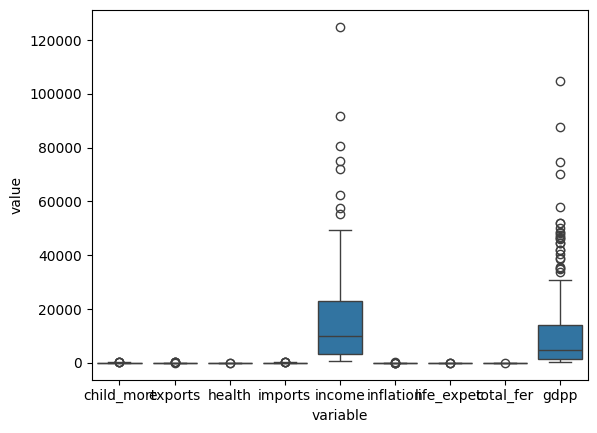

<ipython-input-25-32ed94f2a481>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


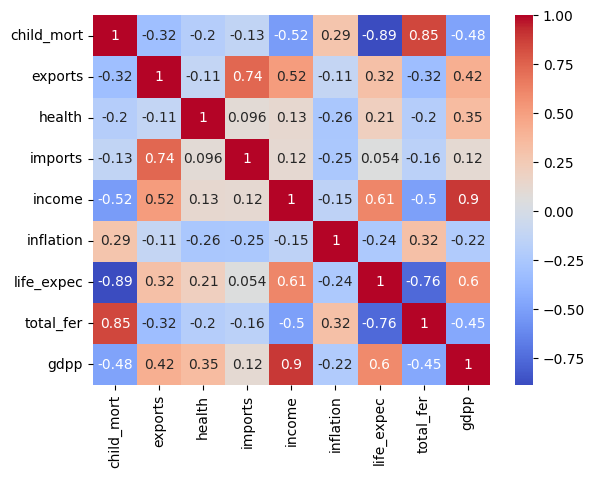

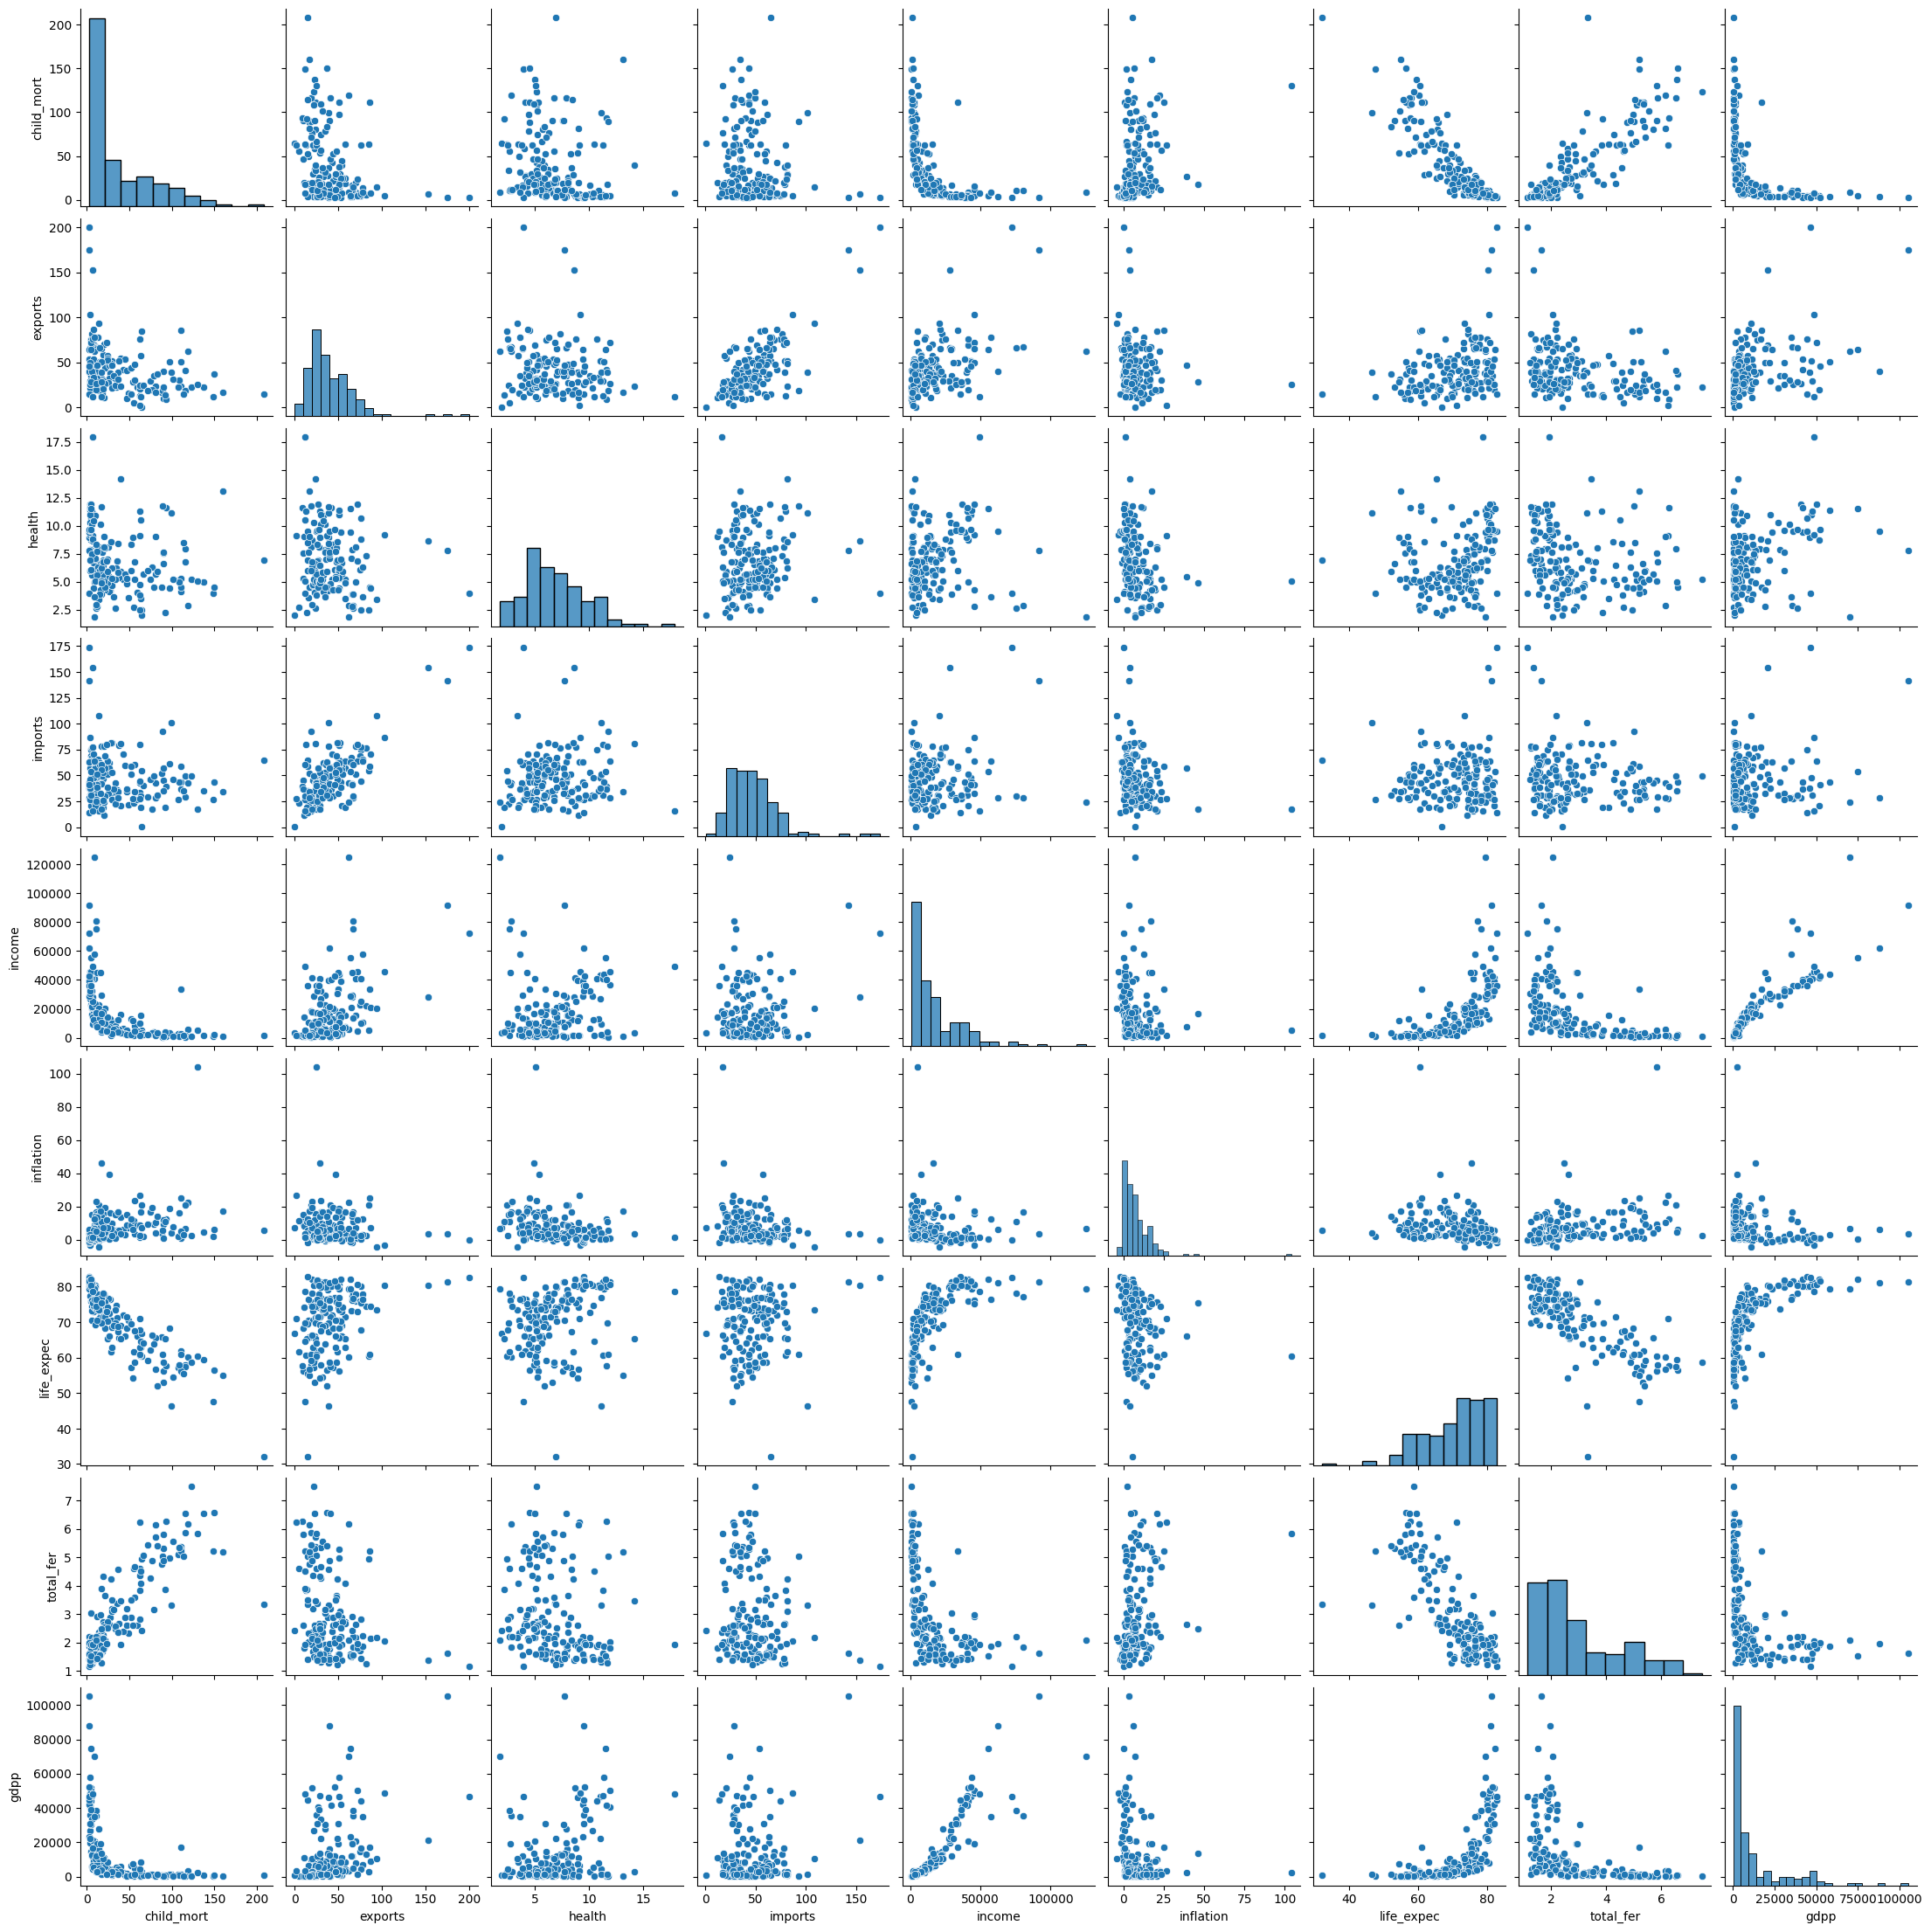

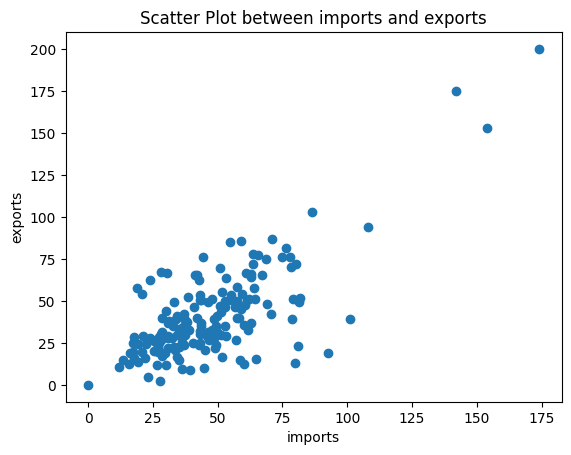

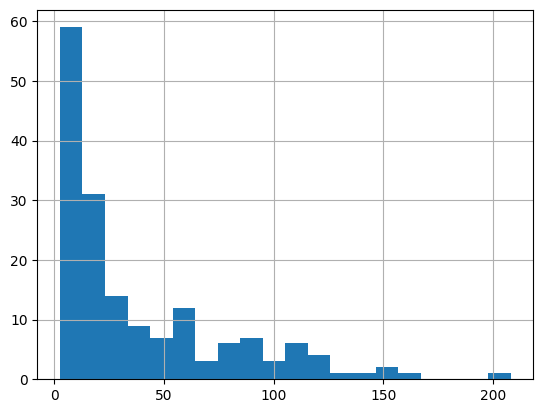

In [25]:
# Box Plot
sns.boxplot(x='variable', y='value', data=pd.melt(df.select_dtypes(include=[np.number])))
plt.show()

# Heat Map
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Pair Plot
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

# Scatter Plot
plt.scatter(df['imports'], df['exports'])
plt.xlabel('imports')
plt.ylabel('exports')
plt.title('Scatter Plot between imports and exports')
plt.show()

# Histogram
df['child_mort'].hist(bins=20)
plt.show()


### PCA

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
داده های خود را با استفاده از الگوریتم PCA به 2 بعد کاهش دهید.دقت کنید که به داده های اصلی نیاز داریم. پس حتما آن ها را ذخیره کنید.
</font>
</p>
</div>

In [26]:
## TODO
from sklearn.decomposition import PCA

# Assuming X is your feature matrix (excluding any target variable)
X = df.drop(columns=['country'])

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the reduced dimensions
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the new DataFrame with the target variable (if applicable)
pca_df['country'] = df['country']

print(df.head())
print(pca_df.head)



               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
<bound method NDFrame.head of           PC1       PC2              country
0   -2.913025  0.095621          Afghanistan
1    0.429911 -0.588156              Albania
2   -0.285225 -0.455174              Algeria
3   -2.932423  1.695555               Angola
4    1.033576  0.136659  Antigua and Barbu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Clustering

### Similarity

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> در این مرحله نیاز است که ماتریس شباهت دادگان را به دست آورید.برای هر یک از داده ها برداری از ویژگی هایش را در نظر گرفته  و ماتریس شباهت رابرای کل  دیتاست به دست آورید.برای معیار شباهت نیز یک بار از فاصله اقلیدسی و یک بار از شباهت کوسینوسی کمک بگیرید.
این کار را هم برای داده های کاهش داده شده و هم برای داده های اصلی انجام دهید.
</font>
</p>
</div>

In [27]:
## TODO
from sklearn.metrics import pairwise_distances

# Assuming original_data and reduced_data are your original and reduced datasets
original_numeric_data = df.iloc[:, 1:]  # Assuming the first two columns are non-numeric
reduced_numeric_data = pca_df.iloc[:, :2]

euclidean_distance_original = pairwise_distances(original_numeric_data, metric='euclidean')
euclidean_distance_reduced = pairwise_distances(reduced_numeric_data, metric='euclidean')

cosine_similarity_original = pairwise_distances(original_numeric_data, metric='cosine')
cosine_similarity_reduced = pairwise_distances(reduced_numeric_data, metric='cosine')


print("Euclidean Distance Matrix - Original Data:")
print(euclidean_distance_original)

print("\nEuclidean Distance Matrix - Reduced Data:")
print(euclidean_distance_reduced)

print("\nCosine Similarity Matrix - Original Data:")
print(cosine_similarity_original)

print("\nCosine Similarity Matrix - Reduced Data:")
print(cosine_similarity_reduced)


Euclidean Distance Matrix - Original Data:
[[    0.          9040.96071291 11947.14069887 ...  2979.48366502
   2968.49182888  1900.67511061]
 [ 9040.96071291     0.          2993.06874697 ...  6109.42286769
   6118.2624461   7151.56709877]
 [11947.14069887  2993.06874697     0.         ...  8980.76622413
   8989.99232472 10077.10919701]
 ...
 [ 2979.48366502  6109.42286769  8980.76622413 ...     0.
     72.28003874  1222.41284147]
 [ 2968.49182888  6118.2624461   8989.99232472 ...    72.28003874
      0.          1209.79871756]
 [ 1900.67511061  7151.56709877 10077.10919701 ...  1222.41284147
   1209.79871756     0.        ]]

Euclidean Distance Matrix - Reduced Data:
[[0.         3.41215042 2.68490324 ... 3.64911111 1.04587583 0.39343572]
 [3.41215042 0.         0.72739542 ... 1.98008911 2.36628922 3.46469032]
 [2.68490324 0.72739542 0.         ... 2.00541247 1.63910078 2.74521679]
 ...
 [3.64911111 1.98008911 2.00541247 ... 0.         2.81841637 3.48217834]
 [1.04587583 2.36628922 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Kmeans

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> بعد از پیاده سازی ماتریش شباهت باید در این مرحله الگوریتم Kmeans را پیاده سازی کنید.دقت کنید استفاده از
    .
کتابخانه های  آماده مجاز نیست. همچنین مراکز اولیه باید به صورت تصادفی انتخاب شود و تعداد خوشه ها را نیز به صورت بهینه انتتخاب کنید
الگوریتم را تا  زمانی ادامه دهید که به دقت مناسبی برسد.
دقت کنید مجدد خوشه بندی را برای هر دو داده کاهش داده شده و اصلی باید انجام دهید.
</font>
</p>
</div>

In [28]:
## TODO
import numpy as np
from sklearn import datasets
import random
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with both numerical and categorical columns
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)

# Extract the numerical values
data = df_encoded.values

pca_df_encoded = pd.get_dummies(pca_df)

# Extract the numerical values
pca_data = pca_df_encoded.values


# Function to assign points to the nearest centroid
def assign_to_clusters(data, centroids):
    clusters = {}
    for idx, point in enumerate(data):
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        if cluster_index not in clusters:
            clusters[cluster_index] = [idx]
        else:
            clusters[cluster_index].append(idx)
    return clusters

# K-means algorithm
def k_means(data, k, max_iterations=300):
    centroids = random.sample(list(data), k)

    for _ in range(max_iterations):
        clusters = assign_to_clusters(data, centroids)
        new_centroids = []
        for cluster_index in clusters:
            cluster_mean = np.mean(data[clusters[cluster_index]], axis=0)
            new_centroids.append(cluster_mean)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters

# Function to calculate accuracy
def cal_accuracy(data, max_k, num_runs=5):
    all_wcss_values = []
    all_silhouette_scores = []
    for _ in range(num_runs):
        wcss_values = []
        silhouette_scores = []
        for k in range(2, max_k + 1):
            centroids, clusters = k_means(data, k)

            # Calculate WCSS
            wcss = 0
            for cluster_index in clusters:
                cluster_points = data[clusters[cluster_index]]
                centroid = centroids[cluster_index]
                wcss += np.sum(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)
            wcss_values.append(wcss)

            # Calculate Silhouette score
            labels = np.zeros(len(data), dtype=int)
            for i, cluster_index in enumerate(clusters):
                for point_index in clusters[cluster_index]:
                    labels[point_index] = i
            silhouette_avg = silhouette_score(data, labels)
            silhouette_scores.append(silhouette_avg)

        all_wcss_values.append(wcss_values)
        all_silhouette_scores.append(silhouette_scores)

    return all_wcss_values, all_silhouette_scores

# Run cal_accuracy function
max_k = 10
num_runs = 5
wcss_results, silhouette_results = cal_accuracy(data, max_k, num_runs)
pca_wcss_results, pca_silhouette_results = cal_accuracy(pca_data, max_k, num_runs)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Results

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله نیاز است که نموداری بر اساس خوشه های خود همچنین دقت الگوریتم خود را به صورت نمودار و عددی نشان دهید.

</font>
</p>
</div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


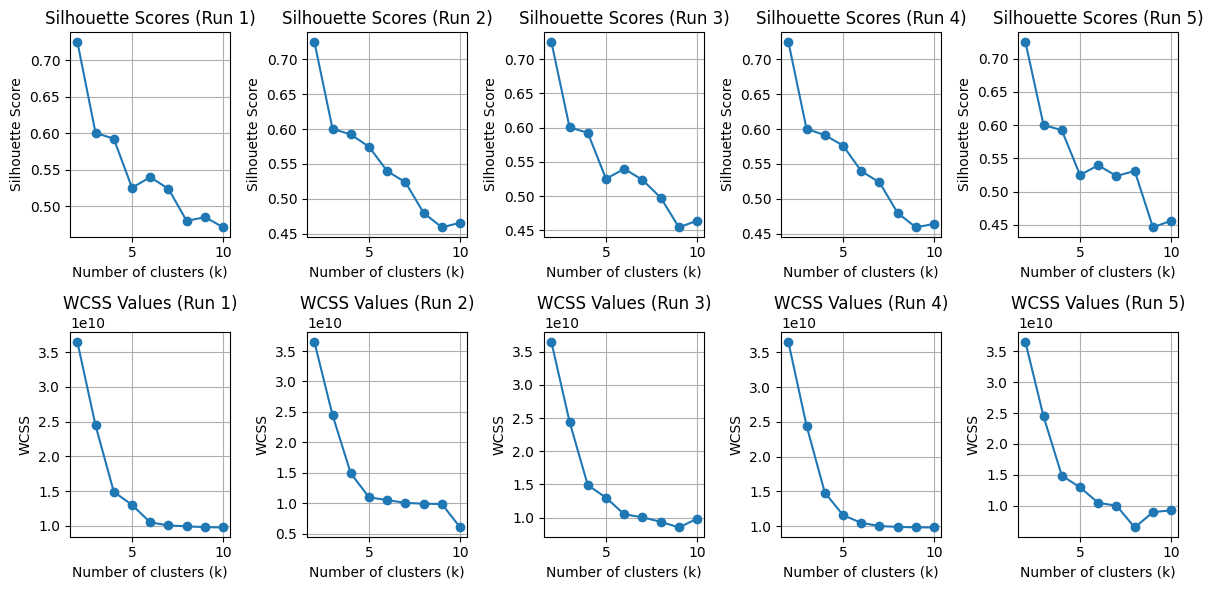

------------------------------------------
------------------------------------------


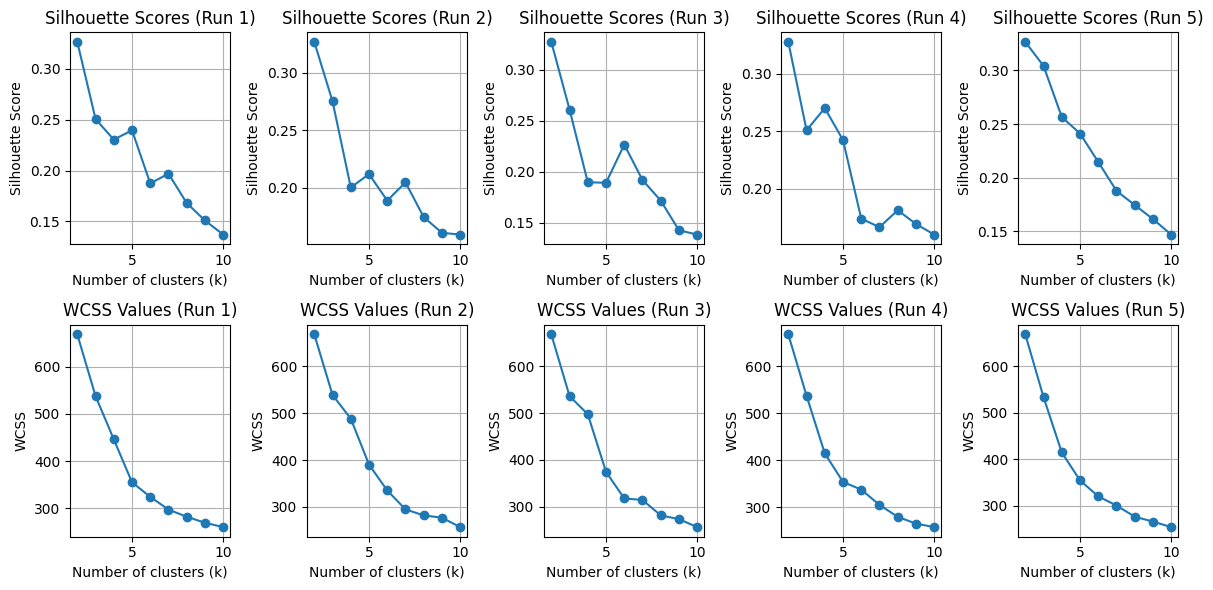

In [29]:
## TODO


# Plot Silhouette scores and WCSS values against k values for each run
plt.figure(figsize=(12, 6))

for i in range(num_runs):
    plt.subplot(2, num_runs, i + 1)
    plt.plot(range(2, max_k + 1), silhouette_results[i], marker='o')
    plt.title(f'Silhouette Scores (Run {i+1})')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    plt.subplot(2, num_runs, num_runs + i + 1)
    plt.plot(range(2, max_k + 1), wcss_results[i], marker='o')
    plt.title(f'WCSS Values (Run {i+1})')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.grid(True)

plt.tight_layout()
plt.show()

print("------------------------------------------")
print("------------------------------------------")


# Plot Silhouette scores and WCSS values against k values for each run
plt.figure(figsize=(12, 6))

for i in range(num_runs):
    plt.subplot(2, num_runs, i + 1)
    plt.plot(range(2, max_k + 1), pca_silhouette_results[i], marker='o')
    plt.title(f'Silhouette Scores (Run {i+1})')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    plt.subplot(2, num_runs, num_runs + i + 1)
    plt.plot(range(2, max_k + 1), pca_wcss_results[i], marker='o')
    plt.title(f'WCSS Values (Run {i+1})')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.grid(True)

plt.tight_layout()
plt.show()

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> نتایج به دست آمده بالا را با یکدیگر مقایسه کرده و نتیجه را توجیه کنید.
</font>
</p>
</div>

In [30]:
"""
کلیدواژه:
wcss = مجموع مربع های درون خوشه ای
silhouette score = امتیاز شبح


optimal k for original dataset
در زمینه خوشه بندی کامینز، انتخاب مقدار بهینه کا می تواند تا حدودی ذهنی باشد و به ویژگی های خاص مجموعه داده شما بستگی دارد.
دو روش متداول برای تعیین کا بهینه، روش روش زانویی با استفاده از مجموع مربع های درون خوشه ای و امتیاز شبح است.
در روش زانویی شما به دنبال نقطه زانو هستید که سرعت کاهش مجموع مربع های درون خوشه ای در آن کاهش می یابد.
این اغلب نشانه خوبی از تعداد بهینه خوشه ها در نظر گرفته می شود. با این حال، روش زانو ممکن است همیشه پاسخ روشن و قطعی ارائه نکند.

نگاه کردن به داده های دیتاست:
1- امتیاز شبح با افزایش کا کاهش می یابد، که نشان می دهد کیفیت خوشه بندی ممکن است در حال کاهش باشد.
2- مجموع مربع های درون خوشه ای با افرایش کا کاهش می یابد، که انتظار می رود افزایش تعداد خوشه ها به طور طبیعی مجموع مربع های درون خوشه ای را کاهش دهد.

با توجه به اطلاعات نمودارها، به نظر می رسد که یک زانو واضح در طرح مجموع مربع های درون خوشه ای وجود ندارد. نمرات شبح
نیز در حال کاهش هستند، که نشان می دهد مقادیر بالاتر کا ممکن است خوشه های معنی داری را ارائه نکنند.

با در نظر گرفتن هر دو نمرات شبح و مجموع مربع های درون خوشه ای، من توصیه می‌کنم مقدار کا ای را انتخاب کنید که در آن تعادلی بین یک نمره
شبح نسبتاً بالا و یک مجموع مربع های درون خوشه ای نسبتاً پایین وجود دارد. در دیتاست ما، کا برابر با سه  انتخاب معقولی به نظر می رسد، زیرا دارای
 امتیاز شبح نسبتا بالایی و کاهش قابل توجهی در مجموع مربع های درون خوشه ای است.
 => optimal k = 3  (silhouette score = 0.6)



optinal k for reduced dataset
با توجه به نمرات شبح و مقادیر مجموع مربع های درون خوشه ای برای مجموعه داده کاهش یافته در اجرای اول،  به نظر می رسد که کا برابر با دو ممکن است
انتخاب معقولی باشد. امتیاز شبح برای کا برابر با دو نسبت به مقادیر دیگر نسبتاً بالاتر است و مجموع مربع های درون خوشه ای کاهش محسوسی را از
کا برابر با دو به کا برابر با سه نشان می دهد. با این حال، تعیین کا بهینه هنوز تا حدودی ذهنی و وابسته به زمینه است.
=> optimal k = 2



analysis of reduced dataset results
تحلیل امتیازات:

1. تنوع امتیاز شبح:
تنوع قابل توجهی در امتیازات شبح در اجراهای مختلف برای مجموعه داده کاهش یافته نشان می دهد که نتایج خوشه بندی به کاهش ابعاد خاص انجام شده توسط پی سی ای
حساس است. اجراهای مختلف ممکن است اجزای اصلی متمایز را به همراه داشته باشد که بر تفکیک پذیری خوشه ها تأثیر می گذارد.

2. شباهت و بزرگی مجموع مربع های درون خوشه ای
مقادیر ثابت مجموع مربع های درون خوشه ای در اجراهای مختلف نشان می‌دهد که، علی‌رغم تغییرات در امتیازات شبح، فشردگی کلی خوشه نسبتاً پایدار باقی می‌ماند.
 این نشان می دهد که مجموعه داده کاهش یافته به طور مداوم خوشه هایی را تشکیل می دهد، البته با درجات متفاوتی از کیفیت شبح.

مقادیر نسبتاً بزرگ مجموع مربع های درون خوشه ای برای مجموعه داده کاهش یافته را می توان به چالش ذاتی ثبت واریانس در فضای کاهش یافته نسبت داد.
نمایش‌های با ابعاد پایین‌تر ممکن است برای حفظ همان سطح اطلاعات و جداسازی خوشه‌ای مانند مجموعه داده اصلی مشکل داشته باشند.



comparison between original dataset and reduced dataset results
نمرات شبح :
امتیازهای شبح برای مجموعه داده اصلی به طور کلی کاهش تدریجی تری را با افزایش کا  نشان می دهد، در حالی که مجموعه داده کاهش یافته کاهش بارزتری را نشان می دهد.
این نشان می دهد که کاهش ابعاد ممکن است ساختار ذاتی داده ها را به خطر بیندازد و بر کیفیت خوشه تأثیر بگذارد.

مجموع مربع های درون خوشه ای:
مقادیر مجموع مربع های درون خوشه ای برای مجموعه داده اصلی با افزایش کا سریعتر کاهش می یابد، که نشان دهنده ساختار تعریف شده و فشرده تر در فضای ویژگی اصلی است.
مجموعه داده کاهش‌یافته، علی‌رغم مقادیر ثابت مجموع مربع های درون خوشه ای، دارای مقادیر بزرگ‌تری است و این تصور را تقویت می‌کند که ثبت واریانس
در فضایی با ابعاد پایین‌تر چالش برانگیز است.


به طور خلاصه، مجموعه داده کاهش یافته، در حالی که برخی از سازگاری خوشه‌بندی را حفظ می‌کند، در حفظ ساختار پیچیده مجموعه داده اصلی با چالش‌هایی مواجه است.
حساسیت امتیازهای شبح به اجراهای مختلف حاکی از یک رابطه ظریف بین کاهش ابعاد و کیفیت خوشه‌بندی است. بررسی دقیق مبادلات بین کاهش ابعاد و عملکرد خوشه‌بندی ضروری است.

"""




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nکلیدواژه: \nwcss = مجموع مربع های درون خوشه ای\nsilhouette score = امتیاز شبح\n\n\noptimal k for original dataset\nدر زمینه خوشه بندی کامینز، انتخاب مقدار بهینه کا می تواند تا حدودی ذهنی باشد و به ویژگی های خاص مجموعه داده شما بستگی دارد.\nدو روش متداول برای تعیین کا بهینه، روش روش زانویی با استفاده از مجموع مربع های درون خوشه ای و امتیاز شبح است.\nدر روش زانویی شما به دنبال نقطه زانو هستید که سرعت کاهش مجموع مربع های درون خوشه ای در آن کاهش می یابد. \nاین اغلب نشانه خوبی از تعداد بهینه خوشه ها در نظر گرفته می شود. با این حال، روش زانو ممکن است همیشه پاسخ روشن و قطعی ارائه نکند.\n\nنگاه کردن به داده های دیتاست:\n1- امتیاز شبح با افزایش کا کاهش می یابد، که نشان می دهد کیفیت خوشه بندی ممکن است در حال کاهش باشد.\n2- مجموع مربع های درون خوشه ای با افرایش کا کاهش می یابد، که انتظار می رود افزایش تعداد خوشه ها به طور طبیعی مجموع مربع های درون خوشه ای را کاهش دهد.\n\nبا توجه به اطلاعات نمودارها، به نظر می رسد که یک زانو واضح در طرح مجموع مربع های درون خوشه ای وجود ندارد. نمرات شبح \nنیز در

### DBSCAN


<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
الگوریتم DBSCAN را بر هر دو داده کاهش داده شده و اصلی پساده سازی کنید.
    مجددا نمی توانید در اینجا از کتابخانه های آماده استفاده کنید.
</font>
</p>
</div>

In [31]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_data(X):
    # Identify categorical columns and encode them
    label_encoders = {}
    for col in range(X.shape[1]):
        if isinstance(X[0, col], str):
            le = LabelEncoder()
            X[:, col] = le.fit_transform(X[:, col])
            label_encoders[col] = le
    return X, label_encoders

def dbscan(X, eps, min_samples):
    labels = np.zeros(X.shape[0], dtype=int)
    cluster_id = 0

    for i in range(X.shape[0]):
        if labels[i] != 0:  # Skip points already assigned to a cluster
            continue

        neighbors = find_neighbors(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            cluster_id += 1
            expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_samples)

    return labels

def find_neighbors(X, i, eps):
    distances = euclidean_distances(X[i].reshape(1, -1), X).flatten()
    return np.where(distances <= eps)[0]

def expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_samples):
    labels[i] = cluster_id
    j = 0
    while j < len(neighbors):
        neighbor = neighbors[j]
        if labels[neighbor] == -1:  # Change noise point to border point
            labels[neighbor] = cluster_id
        elif labels[neighbor] == 0:  # Process unvisited point
            labels[neighbor] = cluster_id
            new_neighbors = find_neighbors(X, neighbor, eps)
            if len(new_neighbors) >= min_samples:
                neighbors = np.concatenate((neighbors, new_neighbors))
        j += 1

# Example usage on df (original dataset)
eps_value = 0.5
min_samples_value = 5

# Preprocess non-numeric data
df_values, label_encoders = preprocess_data(df.values)

# Apply DBSCAN
df_labels_dbscan = dbscan(df_values, eps_value, min_samples_value)


# Example usage on pca_df (reduced dataset)
eps_value = 0.5
min_samples_value = 5

# Preprocess non-numeric data
pca_df_values, label_encoders = preprocess_data(pca_df.values)

# Apply DBSCAN
df_labels_dbscan = dbscan(pca_df_values, eps_value, min_samples_value)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Results

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله نیاز است که نموداری بر اساس خوشه های خود همچنین دقت الگوریتم خود را به صورت نمودار و عددی نشان دهید.
همچنین مقادری بهینه minpts و eps را گزارش کنید.
</font>
</p>
</div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


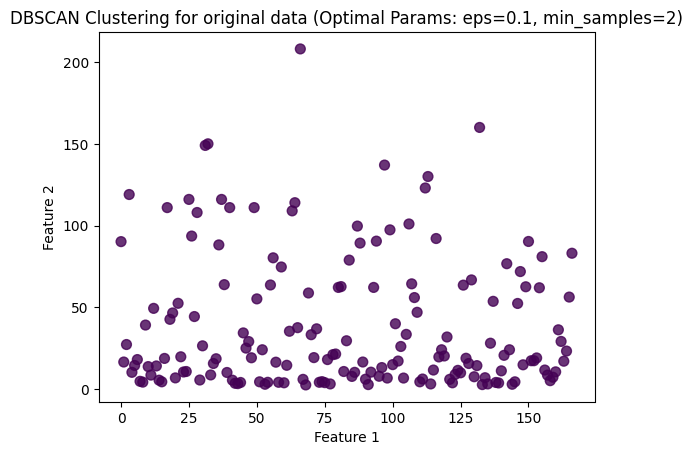

Optimal Parameters - eps: 0.1, min_samples: 2


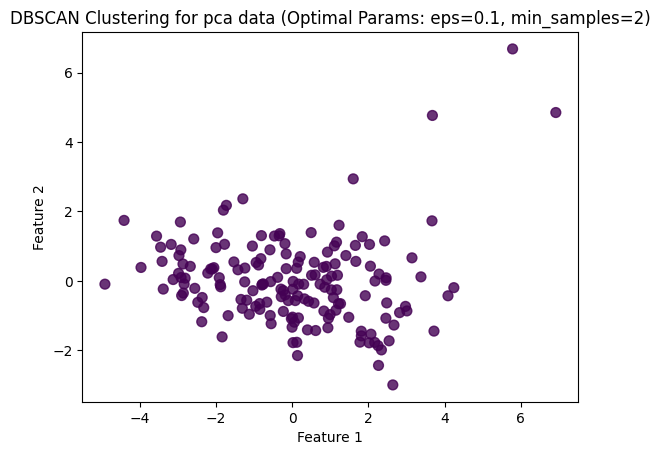

Optimal Parameters - eps: 0.1, min_samples: 2


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to perform DBSCAN with given parameters and calculate silhouette score
def dbscan_and_score(X, eps, min_samples):
    labels = dbscan(X, eps, min_samples)
    if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(X, labels)
    else:
        score = 0
    return score

# Grid search over a range of min_samples and eps values
min_samples_range = range(2, 10)
eps_range = np.arange(0.1, 1.0, 0.1)
best_score = -1
pca_best_score = -1
best_min_samples = None
best_eps = None
pca_best_min_samples = None
pca_best_eps = None

for min_samples in min_samples_range:
    for eps in eps_range:
        score = dbscan_and_score(df_values, eps, min_samples)
        if score > best_score:
            best_score = score
            best_min_samples = min_samples
            best_eps = eps
        pca_score = dbscan_and_score(pca_df_values, eps, min_samples)
        if pca_score > pca_best_score:
            pca_best_score = pca_score
            pca_best_min_samples = min_samples
            pca_best_eps = eps

# Apply DBSCAN with the optimal parameters
optimal_labels = dbscan(df_values, best_eps, best_min_samples)
pca_optimal_labels = dbscan(pca_df_values, pca_best_eps, pca_best_min_samples)


# Plot the results
plt.scatter(df_values[:, 0], df_values[:, 1], c=optimal_labels, cmap='viridis', s=50, alpha=0.8)
plt.title(f'DBSCAN Clustering for original data (Optimal Params: eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print(f'Optimal Parameters - eps: {best_eps}, min_samples: {best_min_samples}')



plt.scatter(pca_df_values[:, 0], pca_df_values[:, 1], c=optimal_labels, cmap='viridis', s=50, alpha=0.8)
plt.title(f'DBSCAN Clustering for pca data (Optimal Params: eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print(f'Optimal Parameters - eps: {best_eps}, min_samples: {best_min_samples}')




<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نتایج به دست آمده از مرحله قبل را با این مرحله مقایسه کرده و علت بهتر بودن الگوریتم بهینه را توجیه کنید
</font>
</p>
</div>

In [32]:
# در گزارش آورده شده

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Similarity

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> در این مرحله نیاز است که ماتریس شباهت دادگان را به دست آورید.برای هر یک از داده ها برداری از ویژگی هایش را در نظر گرفته  و ماتریس شباهت رابرای کل  دیتاست به دست آورید.برای معیار شباهت نیز یک بار از فاصله اقلیدسی و یک بار از شباهت کوسینوسی کمک بگیرید.</font>
</p>
</div>

In [33]:
## TODO
# تکراری !

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Kmeans

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> بعد از پیاده سازی ماتریش شباهت باید در این مرحله الگوریتم Kmeans را پیاده سازی کنید.دقت کنید استفاده از
    .
کتابخانه های  آماده مجاز نیست. همچنین مراکز اولیه باید به صورت تصادفی انتخاب شود و تعداد خوشه ها را نیز به صورت بهینه انتتخاب کنید
الگوریتم را تا  زمانی ادامه دهید که به دقت مناسبی برسد.
</font>
</p>
</div>

In [34]:
## TODO
# تکراری !

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Results

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله نیاز است که نموداری بر اساس خوشه های خود همچنین دقت الگوریتم خود را به صورت نمودار و عددی نشان دهید.

</font>
</p>
</div>

In [35]:
## TODO
# تکراری !

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Association rules

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله باید هر دو دیتا ست داده شده به شما را خوانده و سپس برای محموعه داده کوچکتر آستانه پشتیبانی و آستانه اطمینان را به صورت ورودی از کاربر گرفته و سپس تمام قوانین انجمنی معتبر را برای آن ها به دست آورید.
    برای مجموعه داده های بزرگتر نیز مجدد آستانه پشتنیبانی و اطمینان را دریافت کرده و 3 کالایی که بیشترین خرید را با هم داشته اند به دست آورید.
</font>
</p>
</div>

In [36]:
# small dataset



from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd




# Function to extract association rules for a dataset based on user-defined thresholds
def extract_association_rules(dataset_filename, minsup, minconf):
    # Load the dataset
    data = pd.read_csv(dataset_filename)


    #preprocess

    transactions = []
    for _, row in data.iterrows():
        # Extract non-null items from the row
        items = row.dropna().tolist()

        # Append the list of items to the transactions list
        transactions.append(items)

    # Display the list of transactions
    #print("List of Transactions:")
    #print(transactions)

    # Split each string into a list of items
    transactions_split = [transaction[0].split(',') for transaction in transactions]
    print(transactions_split)

    # Flatten the list of transactions
    flat_items = [item for sublist in transactions_split for item in sublist]

    # Get unique items
    unique_items = list(set(flat_items))

    # Create a DataFrame with one-hot encoding for all unique items
    encoded_df = pd.DataFrame(False, columns=unique_items, index=range(len(transactions_split)))

    # Fill the DataFrame based on the presence of items in each transaction
    for idx, transaction in enumerate(transactions_split):
        encoded_df.loc[idx, transaction] = True

    # Display the boolean-encoded DataFrame
    #print("Boolean-Encoded Dataset:")
    #print(encoded_df)

    # Preprocess the data (assuming the data is in the right format with transactions as rows)
    # For 'GroceryStoreDataSet.csv', you might need to transform it into a suitable format




    # Apply Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(encoded_df, min_support=minsup, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minconf)

    # Filter rules based on minconf threshold
    valid_rules = rules[rules['confidence'] >= minconf]

    return valid_rules





# Get user input for the small dataset
small_dataset_filename = 'GroceryStoreDataSet.csv'
minsup_small = float(input("Enter the minsup threshold for the small dataset: "))
minconf_small = float(input("Enter the minconf threshold for the small dataset: "))

# Extract association rules for the small dataset
valid_rules_small = extract_association_rules(small_dataset_filename, minsup_small, minconf_small)
print("\nValid association rules for the small dataset:")
print(valid_rules_small)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter the minsup threshold for the small dataset: 0.01
Enter the minconf threshold for the small dataset: 0.5
[['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'], ['BREAD', 'TEA', 'BOURNVITA'], ['JAM', 'MAGGI', 'BREAD', 'MILK'], ['MAGGI', 'TEA', 'BISCUIT'], ['BREAD', 'TEA', 'BOURNVITA'], ['MAGGI', 'TEA', 'CORNFLAKES'], ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'], ['JAM', 'MAGGI', 'BREAD', 'TEA'], ['BREAD', 'MILK'], ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'], ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'], ['COFFEE', 'SUGER', 'BOURNVITA'], ['BREAD', 'COFFEE', 'COCK'], ['BREAD', 'SUGER', 'BISCUIT'], ['COFFEE', 'SUGER', 'CORNFLAKES'], ['BREAD', 'SUGER', 'BOURNVITA'], ['BREAD', 'COFFEE', 'SUGER'], ['BREAD', 'COFFEE', 'SUGER'], ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

Valid association rules for the small dataset:
               antecedents                    consequents  antecedent support  \
0                    (TEA)                        (BREAD)            0.368421   
1                   (MILK)       

In [37]:
# big dataset



from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd




# Function to extract association rules for a dataset based on user-defined thresholds
def find_top_purchased(dataset_filename, minsup, minconf):
    # Load the dataset
    data = pd.read_csv(dataset_filename)


    #preprocess

    transactions = []
    for _, row in data.iterrows():
        # Extract non-null items from the row
        items = row.dropna().tolist()

        # Append the list of items to the transactions list
        transactions.append(items)

    # Display the list of transactions
    #print("List of Transactions:")
    #print(transactions)

    transactions_split = transactions

    # Flatten the list of transactions
    flat_items = [item for sublist in transactions_split for item in sublist]

    # Get unique items
    unique_items = list(set(flat_items))

    # Create a DataFrame with one-hot encoding for all unique items
    encoded_df = pd.DataFrame(False, columns=unique_items, index=range(len(transactions_split)))

    # Fill the DataFrame based on the presence of items in each transaction
    for idx, transaction in enumerate(transactions_split):
        encoded_df.loc[idx, transaction] = True

    # Display the boolean-encoded DataFrame
    #print("Boolean-Encoded Dataset:")
    #print(encoded_df)


    # Preprocess the data (assuming the data is in the right format with transactions as rows)
    # For 'GroceryStoreDataSet.csv', you might need to transform it into a suitable format




    # Apply Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(encoded_df, min_support=minsup, use_colnames=True)


    print(frequent_itemsets[['itemsets', 'support']])

    # Find the top 3 products purchased simultaneously
    top_3_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)].nlargest(1, 'support')

    return top_3_itemsets

# Get user input for the small dataset
big_dataset_filename = 'Grocery Products Purchase.csv'
minsup_big = float(input("Enter the minsup threshold for the small dataset: "))
minconf_big = float(input("Enter the minconf threshold for the small dataset: "))

# Extract top 3 products that are purchased simultanously for the big dataset
products = find_top_purchased(big_dataset_filename, minsup_big, minconf_big)
print("\ntop 3 products that are purchased simultaniously for the big dataset:")
print(products)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter the minsup threshold for the small dataset: 0.01
Enter the minconf threshold for the small dataset: 0.5
                                     itemsets   support
0                         (seasonal products)  0.014235
1                             (specialty bar)  0.027351
2                                    (dishes)  0.017590
3                               (butter milk)  0.027961
4                          (other vegetables)  0.193493
..                                        ...       ...
328      (yogurt, whole milk, tropical fruit)  0.015150
329                (yogurt, whole milk, soda)  0.010473
330        (yogurt, whole milk, citrus fruit)  0.010269
331          (yogurt, whole milk, rolls/buns)  0.015557
332  (whole milk, tropical fruit, rolls/buns)  0.010981

[333 rows x 2 columns]

top 3 products that are purchased simultaniously for the big dataset:
      support                                         itemsets
302  0.023183  (other vegetables, whole milk, root vegetable